# Team Alpha Drone

---

Since the API from `api.dronestre.am` provides data on drone strikes in near real time, this might be useful to hold the President accountable if he/she promises to reduce drone strikes. 

**Your mission:** 
- Explore the drone strike data and describe it
- Do some accomanying research to augment your analysis
- Report back any good summary statistics

**Also, we would like to know:**
 - Is this a good source of data?
 - Why / why not?


One of the needs for data science in organizations is to bring measure to vague problems. What can be measured in this dataset with certainty? Drive your presentation from what can be measured and reported. 

Also, if possible, suggest what can be done with this data in terms of actionable outcomes and to what extent.
     
*Keep politics out of the presentation and group work. Let's keep the work and discussion to the data: what is measurable and insights we can draw.  This data isn't meant to prove or disprove anything. It's intended to be an interesting dataset to look at, not a platform for political discourse.*

In [101]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
# First we need to fetch some data using Python requests from API
# Read more about Python requests:
# http://docs.python-requests.org/en/master/user/quickstart/

import requests
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

response = requests.get("http://api.dronestre.am/data")
json_data = response.json()
drone_df = pd.DataFrame(json_data['strike'])

In [2]:
drone_df.head(3).T

,0,1,2
_id,55c79e711cbee48856a30886,55c79e711cbee48856a30887,55c79e711cbee48856a30888
articles,[],[],[]
bij_link,http://www.thebureauinvestigates.com/2012/03/2...,http://www.thebureauinvestigates.com/2011/08/1...,http://www.thebureauinvestigates.com/2011/08/1...
bij_summary_short,In the first known US targeted assassination u...,First known drone strike in Pakistan kills at ...,"Two killed, including Haitham al-Yemeni an al ..."
bureau_id,YEM001,B1,B2
children,,2,
civilians,0,2,
country,Yemen,Pakistan,Pakistan
date,2002-11-03T00:00:00.000Z,2004-06-17T00:00:00.000Z,2005-05-08T00:00:00.000Z
deaths,6,6-8,2


In [3]:
drone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 22 columns):
_id                  647 non-null object
articles             647 non-null object
bij_link             647 non-null object
bij_summary_short    647 non-null object
bureau_id            647 non-null object
children             647 non-null object
civilians            647 non-null object
country              647 non-null object
date                 647 non-null object
deaths               647 non-null object
deaths_max           647 non-null object
deaths_min           647 non-null object
injuries             647 non-null object
lat                  647 non-null object
location             647 non-null object
lon                  647 non-null object
names                647 non-null object
narrative            647 non-null object
number               647 non-null int64
target               647 non-null object
town                 647 non-null object
tweet_id             647 non-null o

In [4]:
drone_df.dtypes

_id                  object
articles             object
bij_link             object
bij_summary_short    object
bureau_id            object
children             object
civilians            object
country              object
date                 object
deaths               object
deaths_max           object
deaths_min           object
injuries             object
lat                  object
location             object
lon                  object
names                object
narrative            object
number                int64
target               object
town                 object
tweet_id             object
dtype: object

In [5]:
# replace Pakistan-Afghanistan Border with most common country = Pakistan

print drone_df['country'].value_counts()

drone_df['country'].replace('Pakistan-Afghanistan Border','Pakistan',inplace=True)

Pakistan                       430
Yemen                          195
Somalia                         21
Pakistan-Afghanistan Border      1
Name: country, dtype: int64


In [6]:
# massum's contribution - - - -- -- -- - -- -- - --

drone_df.injuries = drone_df.injuries.apply(lambda x: 0 if x == '' else x)
drone_df["bins"] = drone_df.injuries.apply(lambda x: 0 if x == 0 else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "Some" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "2-3" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "2-4" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "3-4" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "1-3" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "1-4" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "4-6" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "2-5" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "0-2" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "0-3" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "1-2" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "1-6" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "0-4" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "3-6" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "4-8" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "6-9" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "4-7" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 2 if x == "5-11" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 4 if x == "5-30" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 3 if x == "2-24" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 2 if x == "Several" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 3 if x == "Dozens" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 3 if x == "Dozens" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 2 if x == "1-8" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 3 if x == "Dozens" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if x == "0-1" else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: int(x))
drone_df["bins"] = drone_df.bins.apply(lambda x: 1 if int(x)>0 and int(x)<6 else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 2 if int(x)>=6 and int(x)<12 else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 3 if int(x)>=12 and int(x)<24 else x)
drone_df["bins"] = drone_df.bins.apply(lambda x: 4 if int(x)>=24 and int(x)<100 else x)

In [7]:
## massum - -- - -- - -- - -- - -- --Children Column
drone_df.children = drone_df.children.apply(lambda x: 0 if x == '' else x)
drone_df.children = drone_df.children.apply(lambda x: 1 if x == 'Possibly' else x)
drone_df.children = drone_df.children.apply(lambda x: 0 if 'Yes' in str(x) else x)
drone_df.children = drone_df.children.apply(lambda x: 1 if x == 'At least 1' else x)
drone_df.children = drone_df.children.apply(lambda x: 2 if x == 'At least 2' else x)
drone_df.children = drone_df.children.apply(lambda x: 1 if x == '0-1' else x)
drone_df.children = drone_df.children.apply(lambda x: 2 if x == '0-2' else x)
drone_df.children = drone_df.children.apply(lambda x: 0 if x == '0-3' else x)
drone_df.children = drone_df.children.apply(lambda x: 5 if x == '4-Mar' else x)
drone_df.children = drone_df.children.apply(lambda x: int(x))
drone_df.children.value_counts()

0     588
1      29
3      11
2       7
4       5
6       2
5       2
69      1
10      1
8       1
Name: children, dtype: int64

In [ ]:
# missing_coordinates = drone_df[drone_df['lon'] == '']
# missing_coordinates.ix[:,].T

In [8]:
# updating missing coordinates -- -- -- - -- - -- - -- 

shabwah = [14.55, 46.833333]
abyan = [13.333333,45.383333]
lahij = [13.05,44.883333]
marib = [15.923429,45.300780]
al_bayda = [13.989517,45.577477]

drone_df = drone_df.set_value(610, 'lat', 14.55)
drone_df = drone_df.set_value(610,'lon', 46.833333)

drone_df = drone_df.set_value(611, 'lat', 16.666667)
drone_df = drone_df.set_value(611, 'lon', 49.5)

drone_df = drone_df.set_value(612,'lat',13.333333)
drone_df = drone_df.set_value(612,'lon',45.383333)

drone_df =  drone_df.set_value(613,'lat',14.55)
drone_df =  drone_df.set_value(613,'lon',46.833333)

drone_df =  drone_df.set_value(614,'lat',13.05)
drone_df =  drone_df.set_value(614,'lon',44.883333)

drone_df =  drone_df.set_value(615,'lat',33.43)
drone_df =  drone_df.set_value(615,'lon',70.403889)

drone_df =  drone_df.set_value(616,'lat',shabwah[0])
drone_df =  drone_df.set_value(616,'lon',shabwah[1])

drone_df = drone_df.set_value(618,'lat',abyan[0])
drone_df = drone_df.set_value(618,'lon',abyan[1])

drone_df = drone_df.set_value(621,'lat',abyan[0])
drone_df = drone_df.set_value(621,'lon',abyan[1])

drone_df = drone_df.set_value(622,'lat',shabwah[0])
drone_df = drone_df.set_value(622,'lon',shabwah[1])

drone_df = drone_df.set_value(624,'lat',lahij[0])
drone_df = drone_df.set_value(624,'lon',lahij[1])

drone_df = drone_df.set_value(626,'lat',1.659726)
drone_df = drone_df.set_value(626,'lon',42.450708)

drone_df = drone_df.set_value(627,'lat',14.762406)
drone_df = drone_df.set_value(627,'lon',45.677630)

drone_df = drone_df.set_value(628,'lat',abyan[0])
drone_df = drone_df.set_value(628,'lon',abyan[1])

drone_df = drone_df.set_value(629,'lat',shabwah[0])
drone_df = drone_df.set_value(629,'lon',shabwah[1])

drone_df = drone_df.set_value(630,'lat',15.069117)
drone_df = drone_df.set_value(630,'lon',50.633199)

drone_df = drone_df.set_value(631,'lat',marib[0])
drone_df = drone_df.set_value(631,'lon',marib[1])

drone_df = drone_df.set_value(632,'lat',16.057152)
drone_df = drone_df.set_value(632,'lon',48.533667)

drone_df = drone_df.set_value(633,'lat',14.325198)
drone_df = drone_df.set_value(633,'lon',47.447179)

drone_df = drone_df.set_value(634,'lat',shabwah[0])
drone_df = drone_df.set_value(634,'lon',shabwah[1])

drone_df = drone_df.set_value(635,'lat',shabwah[0])
drone_df = drone_df.set_value(635,'lon',shabwah[1])

drone_df = drone_df.set_value(636,'lat',shabwah[0])
drone_df = drone_df.set_value(636,'lon',shabwah[1])

drone_df = drone_df.set_value(638,'lat',14.679388)
drone_df = drone_df.set_value(638,'lon',45.929459)

drone_df = drone_df.set_value(639,'lat',al_bayda[0])
drone_df = drone_df.set_value(639,'lon',al_bayda[1])

drone_df = drone_df.set_value(640,'lat',al_bayda[0])
drone_df = drone_df.set_value(640,'lon',al_bayda[1])

drone_df = drone_df.set_value(641,'lat',al_bayda[0])
drone_df = drone_df.set_value(641,'lon',al_bayda[1])

drone_df = drone_df.set_value(643,'lat',33.689178)
drone_df = drone_df.set_value(643,'lon',70.342825)

drone_df = drone_df.set_value(644,'lat',14.180502)
drone_df = drone_df.set_value(644,'lon',46.132042)

drone_df = drone_df.set_value(645,'lat',abyan[0])
drone_df = drone_df.set_value(645,'lon',abyan[1])


In [11]:
drone_df['bij_link'][0]

u'http://www.thebureauinvestigates.com/2012/03/29/yemen-reported-us-covert-actions-since-2001/'

In [102]:
drone_df.date = pd.to_datetime(drone_df.date)
drone_df[["children","civilians","deaths","deaths_max","deaths_min","injuries"]] = \
        drone_df[["children","civilians","deaths","deaths_max","deaths_min","injuries"]].replace("",0)

In [103]:
drone_df[["deaths_max","deaths_min"]] = drone_df[["deaths_max","deaths_min"]].replace("?",0)
drone_df["deaths_max"] = pd.to_numeric(drone_df["deaths_max"])
drone_df["deaths_min"] = pd.to_numeric(drone_df["deaths_min"])
drone_df.target = drone_df.target.map(lambda x: x.strip())
drone_df.set_index("date")["2007"]["deaths_max"].sum()

56

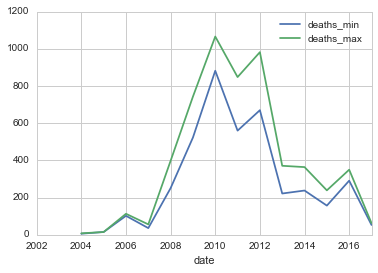

In [104]:
drone_df.set_index("date")[["deaths_min","deaths_max"]].resample("A").sum().plot();

In [112]:
# drone_df[drone_df['target'] == 'Maulvi Nazir'].T
# drone_df[drone_df['target'] == 'Baitullah Mehsud']


In [15]:
drone_df[drone_df.target.map(lambda x: "Nazir" in x)].set_index("date")[["deaths_min","deaths_max"]]\
    .resample("A").sum()

,deaths_min,deaths_max
date,,
2008-12-31,24.0,39.0
2009-12-31,21.0,28.0
2010-12-31,30.0,34.0
2011-12-31,12.0,22.0
2012-12-31,NaN,NaN
2013-12-31,6.0,11.0


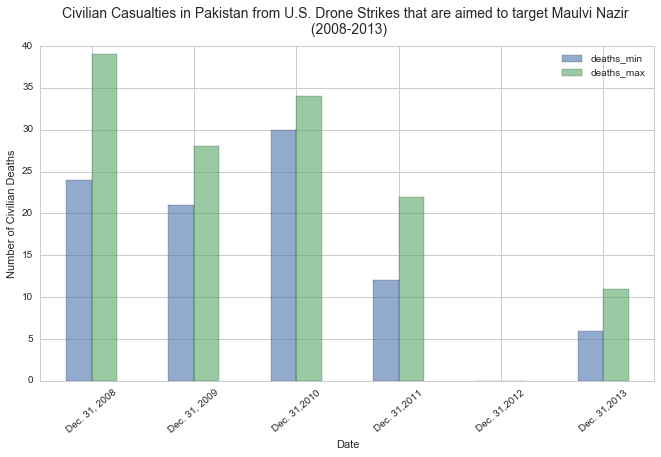

In [111]:

sns.set_style('whitegrid')

dplot = drone_df[drone_df.target.map(lambda x: "Nazir" in x)].set_index("date")[["deaths_min","deaths_max"]].\
        resample("A").sum()

ax = dplot.plot.bar(alpha=0.6,figsize=(11,6))

ax.set_title(\
        'Civilian Casualties in Pakistan from U.S. Drone Strikes that are aimed to target Maulvi Nazir \n (2008-2013)'\
        ,fontsize=14,y=1.02)

ax.set_xlabel("Date")

ax.set_xticklabels(['Dec. 31, 2008','Dec. 31, 2009','Dec. 31,2010','Dec. 31,2011','Dec. 31,2012','Dec. 31,2013']\
        ,rotation=40)

ax.set_ylabel("Number of Civilian Deaths");

''

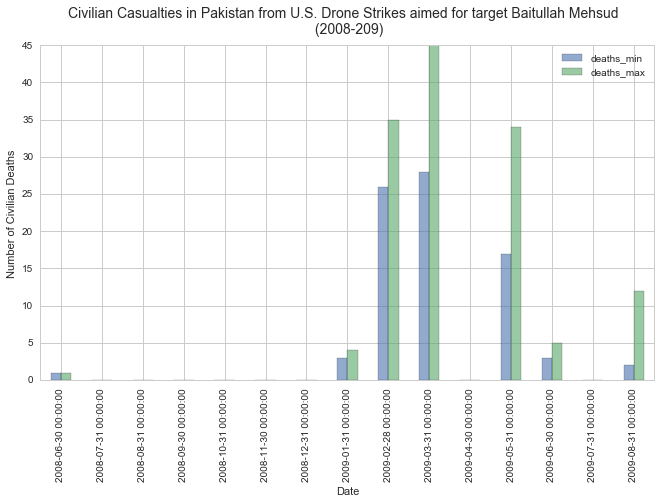

In [108]:
dplot = drone_df[drone_df.target =="Baitullah Mehsud"].set_index("date")[["deaths_min","deaths_max"]].resample("M").sum()
ax = dplot.plot.bar(alpha=0.6,figsize=(11,6))
ax.set_title('Civilian Casualties in Pakistan from U.S. Drone Strikes aimed for target Baitullah Mehsud  \n (2008-209)',fontsize=14,y=1.02)
ax.set_xlabel("Date")
ax.set_xticklabels(['June. 30, 2008','Dec. 31, 2009','Dec. 30,2010',\
                    'Dec. 31,2011','Dec. 30,2012','Dec. 31,2013'],rotation=40)
ax.set_ylabel("Number of Civilian Deaths")
;

In [ ]:
#drone_df.to_csv('updated_for_eda.csv',sep='\t', encoding='utf-8')